# RNN

RNN has internal memory which allows them to analyze sequential data. RNNs are a type of neural network that have hidden states and allow past outputs to be used as inputs. Unlike traditional neural networks that assume all inputs are independent, RNNs maintain a hidden state that carries information from previous time steps.

<div style="text-align: center;">
    <img src="/Users/payal/Desktop/Generalized-ML/NLP/6.webp" alt="RNN" width="800">
</div>



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
time_steps = np.linspace(0, 100, 500)
data = np.sin(time_steps)
data

array([ 0.        ,  0.19906213,  0.39015654,  0.56563445,  0.71847213,
        0.84255206,  0.93290779,  0.98592271,  0.99947484,  0.97302173,
        0.9076222 ,  0.80589396,  0.6719088 ,  0.51102964,  0.32969589,
        0.13516563, -0.06477479, -0.26212252, -0.44897847, -0.61786349,
       -0.76201775, -0.8756713 , -0.95427499, -0.99468264, -0.99527686,
       -0.95603388, -0.87852444, -0.76585095, -0.62252332, -0.45427842,
       -0.26785044, -0.07070142,  0.12927751,  0.32408195,  0.50591461,
        0.66749739,  0.80236276,  0.90511255,  0.97163407,  0.99926471,
        0.98689854,  0.93503051,  0.84573671,  0.72259123,  0.57052314,
        0.39561914,  0.20487998,  0.00594025, -0.19323725, -0.38468018,
       -0.56072581, -0.71432768, -0.83933769, -0.93075216, -0.9849121 ,
       -0.9996497 , -0.97437506, -0.91009984, -0.80939673, -0.67629649,
       -0.51612665, -0.33529818, -0.14104899,  0.05884587,  0.25638535,
        0.44366268,  0.61318186,  0.75815766,  0.87278725,  0.95

In [3]:
## create training sequences

X,Y =[],[]
seq_len =10

for i in range(len(data)-seq_len):
    X.append(data[i:i+seq_len])
    Y.append(data[i+seq_len])

X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((490, 10), (490,))

In [4]:
Y = Y.reshape(-1,1)
X.shape, Y.shape

((490, 10), (490, 1))

In [5]:
## RNN parameters
input_size =1   
hidden_size = 10
output_size =1
lr =0.001
epochs =100

In [6]:
Wxh = np.random.randn(hidden_size, input_size) * 0.01  # Input to hidden
Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # Hidden to hidden
Why = np.random.randn(output_size, hidden_size) * 0.01  # Hidden
bh = np.zeros(( hidden_size,1)) # Hidden bias
by = np.zeros((output_size, 1))  # Output bias


def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1 - np.tanh(x) ** 2

In [7]:
for epoch in range(epochs):
    total_loss=0

    for i in range(X.shape[0]):
        inputs = X[i].reshape(seq_len,1,1)
        target = Y[i].reshape(1,1)

        ## forward pass
        hs = {}
        hs[-1]= np.zeros((hidden_size,1))

        for t in range(seq_len):
            hs[t]= tanh(np.dot(Whh, hs[t-1])+ np.dot(Wxh, inputs[t]) + bh)

        y_pred = np.dot(Why, hs[seq_len-1]) + by

        ## loss calculation
        mse_loss = 0.5 * (y_pred - target) **2
        total_loss += mse_loss

        ## backpropagation through time (BPTT)

        dy = y_pred - target
        dWhy = np.dot(dy, hs[seq_len-1].T)
        dby = dy

        dh_next = np.zeros_like(hs[0])
        dWxh = np.zeros_like(Wxh)
        dWhh = np.zeros_like(Whh)
        dbh = np.zeros_like(bh)

        for t in reversed(range(seq_len)):
            dh = np.dot(Why.T, dy) + dh_next
            dh_raw = dtanh(hs[t]) * dh
            dbh += dh_raw
            dWxh += np.dot(dh_raw, inputs[t].T)
            dWhh += np.dot(dh_raw, hs[t-1].T)
            dh_next = np.dot(Whh.T, dh_raw)

        for dparam in [dWxh, dWhh, dWhy, dbh, dby]:
            np.clip(dparam, -1, 1, out=dparam)

        # Update weights
        Wxh -= lr * dWxh
        Whh -= lr * dWhh
        Why -= lr * dWhy
        bh -= lr * dbh
        by -= lr * dby

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss.mean():.6f}")




Epoch 50/100, Loss: 2.695256
Epoch 100/100, Loss: 0.002283


In [8]:
preds = []
h_prev = np.zeros((hidden_size, 1))
last_seq = X[-1].reshape(seq_len, 1, 1)

In [9]:
last_seq

array([[[-0.57009355]],

       [[-0.72222962]],

       [[-0.84545754]],

       [[-0.93484495]],

       [[-0.98681403]],

       [[-0.99928463]],

       [[-0.97175761]],

       [[-0.90533477]],

       [[-0.80267477]],

       [[-0.66788671]]])

In [10]:
for t in range(50):
    for i in range(seq_len):
        h_prev = tanh(np.dot(Wxh, last_seq[i]) + np.dot(Whh, h_prev) + bh)
    y_pred = np.dot(Why, h_prev) + by
    preds.append(y_pred.item())
    last_seq = np.roll(last_seq, -1)
    last_seq[-1] = y_pred 

In [11]:
len(preds)

50

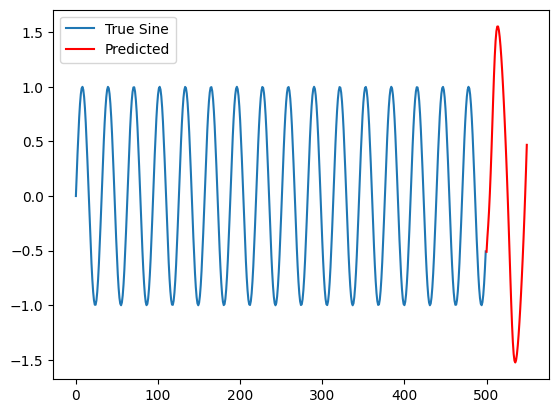

In [12]:
plt.plot(data, label='True Sine')
plt.plot(np.arange(len(data), len(data)+50), preds, label='Predicted', color='red')
plt.legend()
plt.show()